In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("loan_approval_data.csv")



In [2]:
#Loan Status
data['loan_status'].value_counts(normalize=True).mul(100)

Approved    62.215976
Rejected    37.784024
Name: loan_status, dtype: float64

In [3]:
data['loan_status'] = data['loan_status'].replace({'Approved': 1, 'Rejected': 0})

In [4]:
data['loan_status'].mean()

0.622159756383228

In [5]:
#No Of Dependents

data['no_of_dependents'].value_counts(normalize=True).mul(100)

4    17.615367
3    17.029749
0    16.678379
2    16.584680
1    16.327009
5    15.764816
Name: no_of_dependents, dtype: float64

In [6]:
data.groupby(['no_of_dependents'])['loan_status'].mean()

no_of_dependents
0    0.641854
1    0.616930
2    0.622881
3    0.628611
4    0.618351
5    0.603269
Name: loan_status, dtype: float64

In [7]:
data['education'].value_counts(normalize=True).mul(100)

10th        26.376201
8th         25.111267
12th        24.877020
Graduate    23.635512
Name: education, dtype: float64

In [8]:
data.groupby(['education'],as_index=False)['loan_status'].mean()

,education,loan_status
0,10th,0.605684
1,12th,0.623352
2,8th,0.634328
3,Graduate,0.626363


In [9]:
# data = pd.get_dummies(data, columns=['education'])


In [10]:
education_rankings = {
    '10th': 1,
    '8th': 2,
    '12th': 3,
    'Graduate': 4
}

data['education_ranking'] = data['education'].map(education_rankings)
data.drop(columns=['education'], inplace=True)


In [11]:
data['self_employed'].value_counts(normalize=True).mul(100)

Yes    50.784727
No     49.215273
Name: self_employed, dtype: float64

In [12]:
data.groupby(['self_employed'],as_index=False)['loan_status'].mean()

,self_employed,loan_status
0,No,0.628748
1,Yes,0.615775


In [13]:
data['self_employed'] = data['self_employed'].replace({'Yes': 1, 'No': 0})

In [14]:
data['employment_type'].value_counts(normalize=True).mul(100)

Salaried      49.215273
Business      38.299368
Freelancer    12.485360
Name: employment_type, dtype: float64

In [15]:
data.groupby(['employment_type'],as_index=False)['loan_status'].mean()

,employment_type,loan_status
0,Business,0.609786
1,Freelancer,0.634146
2,Salaried,0.628748


In [16]:
data = pd.get_dummies(data, columns=['employment_type'])


In [17]:
data.dtypes

loan_id                       int64
no_of_dependents              int64
self_employed                 int64
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                   int64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value              int64
loan_status                   int64
education_ranking             int64
employment_type_Business      uint8
employment_type_Freelancer    uint8
employment_type_Salaried      uint8
dtype: object

In [18]:
null_values = data.isnull().sum()

# Display columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])

Columns with null values:
Series([], dtype: int64)


In [19]:
data.head()

,loan_id,no_of_dependents,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ranking,employment_type_Business,employment_type_Freelancer,employment_type_Salaried
0,1,2,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3,0,0,1
1,2,0,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,3,0,0,1
2,3,3,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,2,0,0,1
3,4,3,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,2,0,0,1
4,5,5,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,4,0,0,1


In [20]:
data.corr()

,loan_id,no_of_dependents,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ranking,employment_type_Business,employment_type_Freelancer,employment_type_Salaried
loan_id,1.000000,0.005326,-0.028332,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,0.017685,-0.013999,-0.024301,-0.007113,0.028332
no_of_dependents,0.005326,1.000000,0.017627,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114,-0.023303,0.019780,-0.002429,-0.017627
self_employed,-0.028332,0.017627,1.000000,-0.005740,-0.008136,0.002121,-0.008485,-0.018196,0.002669,0.000482,-0.003196,-0.013377,0.023343,0.775594,0.371829,-1.000000
income_annum,0.012592,0.007266,-0.005740,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189,0.002351,0.002461,-0.012300,0.005740
loan_amount,0.008170,-0.003366,-0.008136,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150,-0.001508,0.000288,-0.012730,0.008136
loan_term,0.009809,-0.020111,0.002121,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036,0.016326,-0.007785,0.014656,-0.002121
cibil_score,0.016323,-0.009998,-0.008485,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518,0.013263,-0.018068,0.013737,0.008485
residential_assets_value,0.020936,0.007376,-0.018196,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367,0.004839,-0.011169,-0.011094,0.018196
commercial_assets_value,0.018595,-0.001531,0.002669,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246,0.004140,0.010321,-0.011141,-0.002669
luxury_assets_value,-0.000862,0.002817,0.000482,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,-0.015465,0.000166,0.007702,-0.010597,-0.000482


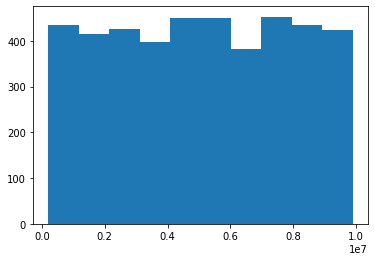

In [21]:
plt.hist(data.income_annum);

In [22]:
data.income_annum.describe()

count    4.269000e+03
mean     5.059124e+06
std      2.806840e+06
min      2.000000e+05
25%      2.700000e+06
50%      5.100000e+06
75%      7.500000e+06
max      9.900000e+06
Name: income_annum, dtype: float64

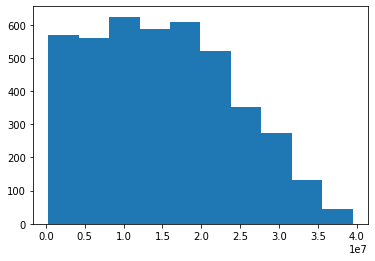

In [23]:
plt.hist(data.loan_amount);

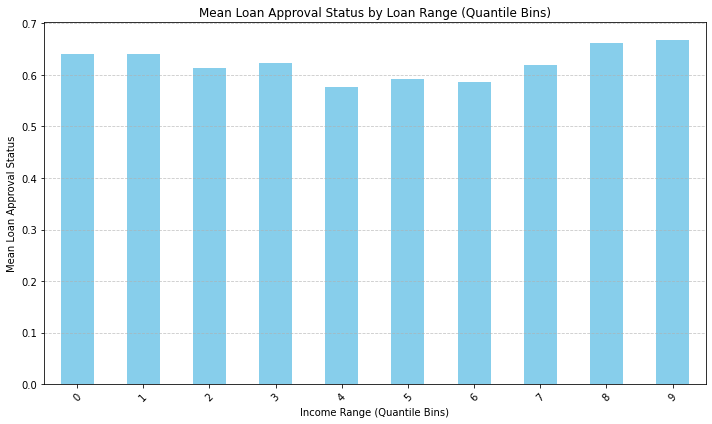

In [24]:
num_bins = 10

data['loan_range'] = pd.qcut(data['loan_amount'], q=num_bins, labels=False)

mean_loan_approval = data.groupby('loan_range')['loan_status'].mean()

plt.figure(figsize=(10, 6))
mean_loan_approval.plot(kind='bar', color='skyblue')
plt.title('Mean Loan Approval Status by Loan Range (Quantile Bins)')
plt.xlabel('Income Range (Quantile Bins)')
plt.ylabel('Mean Loan Approval Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [25]:
data.loan_amount.describe()

count    4.269000e+03
mean     1.513345e+07
std      9.043363e+06
min      3.000000e+05
25%      7.700000e+06
50%      1.450000e+07
75%      2.150000e+07
max      3.950000e+07
Name: loan_amount, dtype: float64

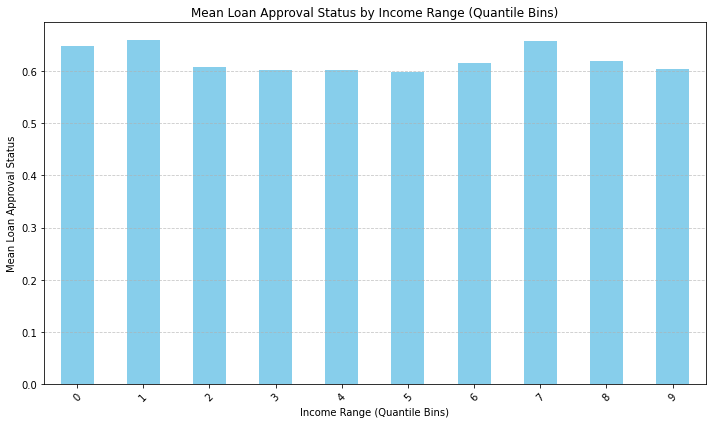

In [26]:
num_bins = 10

data['income_range'] = pd.qcut(data['income_annum'], q=num_bins, labels=False)

mean_loan_approval = data.groupby('income_range')['loan_status'].mean()

plt.figure(figsize=(10, 6))
mean_loan_approval.plot(kind='bar', color='skyblue')
plt.title('Mean Loan Approval Status by Income Range (Quantile Bins)')
plt.xlabel('Income Range (Quantile Bins)')
plt.ylabel('Mean Loan Approval Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [27]:
data.cibil_score.describe()

count    4269.000000
mean      599.936051
std       172.430401
min       300.000000
25%       453.000000
50%       600.000000
75%       748.000000
max       900.000000
Name: cibil_score, dtype: float64

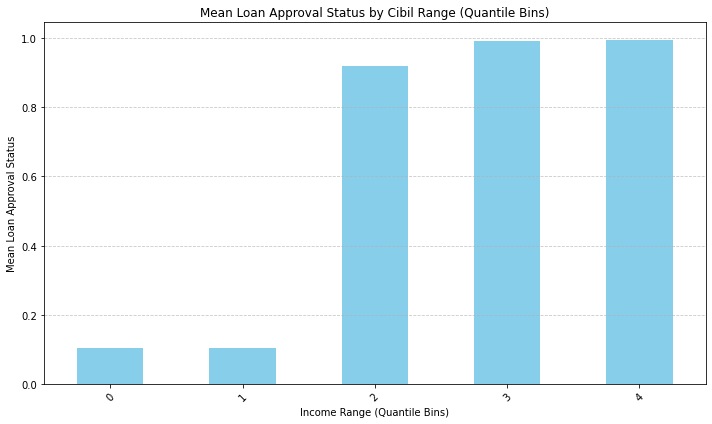

In [28]:
num_bins = 5

data['cibil_range'] = pd.qcut(data['cibil_score'], q=num_bins, labels=False)

mean_loan_approval = data.groupby('cibil_range')['loan_status'].mean()

plt.figure(figsize=(10, 6))
mean_loan_approval.plot(kind='bar', color='skyblue')
plt.title('Mean Loan Approval Status by Cibil Range (Quantile Bins)')
plt.xlabel('Income Range (Quantile Bins)')
plt.ylabel('Mean Loan Approval Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
data.groupby('cibil_range')['loan_status'].mean()

cibil_range
0    0.105140
1    0.104094
2    0.918605
3    0.991745
4    0.995294
Name: loan_status, dtype: float64

In [30]:
def Loan_approval_Prob(cibil_range):
    if cibil_range < 2:
        return 0
    else:
        return 1

In [31]:
data['Loan_approval_Pred_based_Cibil'] = data['cibil_range'].apply(Loan_approval_Prob)


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

actual_loan_status = data['loan_status']
predicted_loan_status = data['Loan_approval_Pred_based_Cibil']

accuracy = accuracy_score(actual_loan_status, predicted_loan_status)

precision = precision_score(actual_loan_status, predicted_loan_status)

recall = recall_score(actual_loan_status, predicted_loan_status)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9390958069805575
Precision: 0.9683346364347146
Recall: 0.932605421686747


In [34]:
data[data.self_employed==1]['self_employed'].value_counts()

1    2168
Name: self_employed, dtype: int64

In [35]:
data[data.self_employed==0]['self_employed'].value_counts()

0    2101
Name: self_employed, dtype: int64

In [36]:
data=data.drop('self_employed',axis=1)

In [37]:
data.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ranking,employment_type_Business,employment_type_Freelancer,employment_type_Salaried,loan_range,income_range,cibil_range,Loan_approval_Pred_based_Cibil
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3,0,0,1,9,9,3,1
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,3,0,0,1,4,3,0,0
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,2,0,0,1,9,9,1,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,2,0,0,1,9,8,1,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,4,0,0,1,8,9,0,0


In [38]:
####Features

In [39]:
data['Loan_by_Income']=data['loan_amount']/data['income_annum']

data['Income_perDependent']=data['income_annum']/(data['no_of_dependents']+1)
data['Loan_by_Income_perDependent']=data['loan_amount']/data['Income_perDependent']

data['Loan_Per_Year']=data['loan_amount']/data['loan_term']
data['Loan_Per_Year_by_income_annum']=data['Loan_Per_Year']/data['income_annum']
data['Loan_Per_Year_by_Income_perDependent']=data['Loan_Per_Year']/data['Loan_by_Income_perDependent']


data['Total_Assets']=data['residential_assets_value']+data['commercial_assets_value']+data['luxury_assets_value']+data['bank_asset_value']
data['Real_Estate_Assests']=data['residential_assets_value']+data['commercial_assets_value']
data['Loan_by_Assests']=data['loan_amount']/data['Total_Assets']
# data['Loan_by_RealEstateAssests']=data['loan_amount']/data['Real_Estate_Assests']

data['Total_Income_Loan_Duration']=data['income_annum']*data['loan_term']
data['Loan_by_Total_income']=data['loan_amount']/(data['Total_Income_Loan_Duration'])
data['Loan_by_Assets_Total_income']=data['loan_amount']/(data['Total_Income_Loan_Duration']+data['Total_Assets'])
data['Loan_by_RealEstateAssets_Total_income']=data['loan_amount']/(data['Total_Income_Loan_Duration']+data['Real_Estate_Assests'])
data['Loan_by_RealEstateAssets_BankAssets_Total_income']=data['loan_amount']/(data['Total_Income_Loan_Duration']+data['Real_Estate_Assests']+data['bank_asset_value'])

data['Loan_by_TotalIncomeAsset_per_dependent']=data['loan_amount']*(data['no_of_dependents']+1)/(data['Total_Assets']+data['Total_Income_Loan_Duration'])


data['Luxury_assets_by_Total_assets']=data['luxury_assets_value']/data['Total_Assets']
data['Liquidity_Ratio']=data['bank_asset_value']/data['Total_Assets']



In [40]:
data.to_csv('Data_2.csv')

In [42]:
for i in data.cibil_range.unique():
     
        
    print("Cibil Range:", i)    
    q=data[data.cibil_range==i]
    
    precision = precision_score(q['loan_status'], q['Loan_approval_Pred_based_Cibil'])
    recall = recall_score(q['loan_status'], q['Loan_approval_Pred_based_Cibil'])
    accuracy = accuracy_score(q['loan_status'], q['Loan_approval_Pred_based_Cibil'])

    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)


Cibil Range: 3
Precision: 0.9917452830188679
Recall: 1.0
Accuracy: 0.9917452830188679
Cibil Range: 0
Precision: 0.0
Recall: 0.0
Accuracy: 0.8948598130841121
Cibil Range: 1
Precision: 0.0
Recall: 0.0
Accuracy: 0.895906432748538
Cibil Range: 4
Precision: 0.9952941176470588
Recall: 1.0
Accuracy: 0.9952941176470588
Cibil Range: 2
Precision: 0.9186046511627907
Recall: 1.0
Accuracy: 0.9186046511627907


/home/aditya_bendapudi/.conda/envs/aditya_bendapudi/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aditya_bendapudi/.conda/envs/aditya_bendapudi/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
